In [2]:
import requests
import inspect
import pytz
import pandas as pd
import numpy as np

from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from time import ctime   # ctime converts epoch time (ex:1661522400) to string form (Thu Aug 25 16:00:00 2022)
from time import gmtime   # Convert a time expressed in seconds since the epoch to a struct_time in UTC in which the dst flag is always zero.
from time import localtime # Like gmtime() but converts to local time.

from datetime import datetime, timedelta
today = datetime.now()
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 20




### 2 fichiers créés par node-red et mis à jour toutes les heures avec openweather node dans onglet Temp/Hum

#### json_file ="C:/Users/jean/OneDrive/Bureau/5days.txt"

#### json_file ="Y:/Documents/5days.txt"

#### le fichier contient une liste de 40 lignes :
- une ligne = 3 heures, 
- 8 lignes par jour 
- sur 5 jours


In [3]:
try:
    json_file = "Y:/Documents/5days.txt"  # pc cuisine
    current = pd.read_json(json_file)
except:
    json_file = "Z:/Documents/5days.txt"  # pc chambre
    current = pd.read_json(json_file)

In [4]:
#current['dates'] = [datetime.fromtimestamp(current.dt[k], pytz.timezone('Europe/Paris')) for k in range(40)]
current['dates'] = [datetime.fromtimestamp(current.dt[k]) for k in range(40)]
current['h_date'] = [datetime.fromtimestamp(current.dt[k]).strftime('%d/%m/%Y %H:%M:%S') for k in range(40)]
current['h_time'] = [datetime.fromtimestamp(current.dt[k]).strftime('%H') for k in range(40)]
current.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   temp        40 non-null     float64       
 1   feels_like  40 non-null     float64       
 2   temp_min    40 non-null     float64       
 3   temp_max    40 non-null     float64       
 4   pressure    40 non-null     int64         
 5   sea_level   40 non-null     int64         
 6   grnd_level  40 non-null     int64         
 7   humidity    40 non-null     int64         
 8   temp_kf     40 non-null     float64       
 9   dt          40 non-null     int64         
 10  dates       40 non-null     datetime64[ns]
 11  h_date      40 non-null     object        
 12  h_time      40 non-null     object        
dtypes: datetime64[ns](1), float64(5), int64(5), object(2)
memory usage: 4.2+ KB


In [5]:
debut = current.head(1).h_date[0]
fin = current.tail(1).h_date[39]
debut, fin

('16/02/2025 01:00:00', '20/02/2025 22:00:00')

<Axes: >

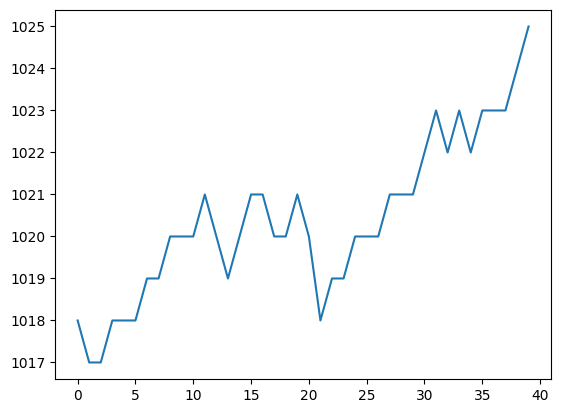

In [6]:
current.pressure.plot()


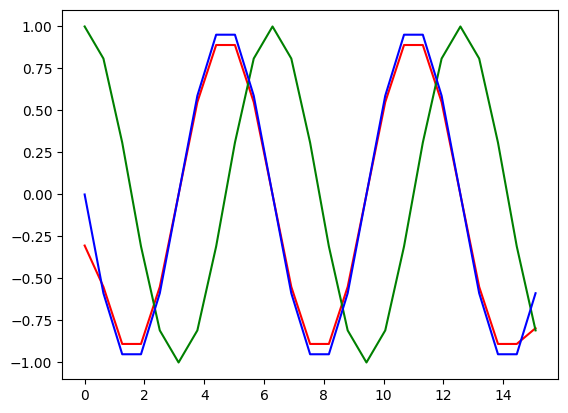

In [7]:
pi = np.pi
x = np.arange(0,5*pi,0.2*pi)
y = np.cos(x) 
# derivative dy/dx = -sin(x)
der = np.gradient(y,x)
plt.plot(x, der, 'r', x, y, 'g', x, -np.sin(x),'b')
plt.show()

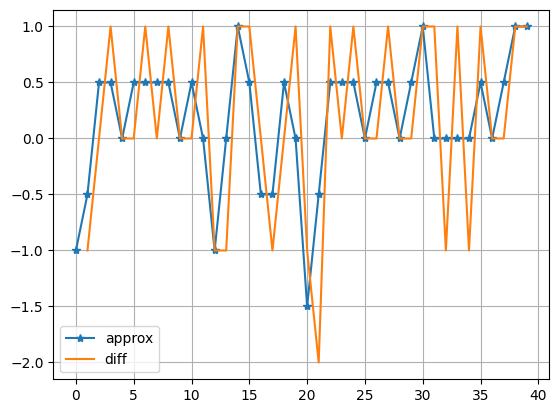

In [8]:
# derivative of pressure
dy = current.pressure#.diff()
#dy.plot()
# we sample a sin(x) function
dx = current.index.step
x = np.arange(0,40)
#current.pressure.diff().plot(label='diff')
# we calculate the derivative, with np.gradient
plt.plot(x,np.gradient(dy, dx), '-*', label='approx')
#plt.plot()
dy.diff().plot(x=x,label='diff')
plt.legend()
plt.grid()


<Axes: >

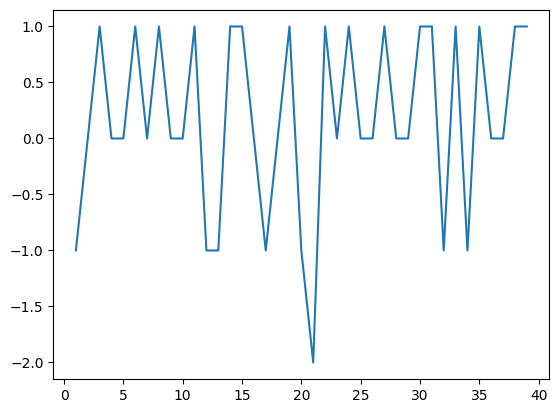

In [9]:
dy.diff().plot()

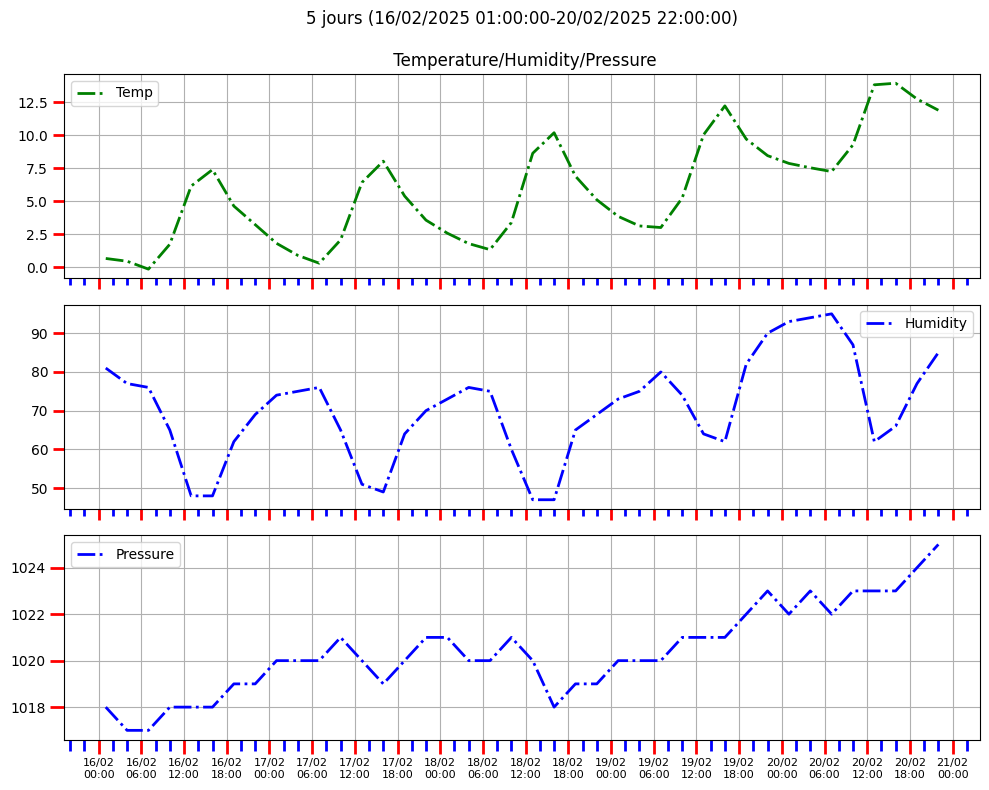

In [10]:
#fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True)
# the size of A4 paper
fig.set_size_inches(10, 8)

ax1.tick_params('x', labelsize=8)
ax2.tick_params('x', labelsize=8)
ax3.tick_params('x', labelsize=8)

# format affichage dates sur axe des x
formatter = DateFormatter('%d/%m\n%H:%M')
#ax1.xaxis.set_major_formatter(formatter)
#ax2.xaxis.set_major_formatter(formatter)
ax3.xaxis.set_major_formatter(formatter)

# nombre de ticks sur axe des x
major_ticks = 1/4                    # toutes les 6 heures pour 1/4, 12h pour 1/2
minor_ticks = major_ticks/3          # facteur div = 4  -> minor ticks toutes les 3 heures

# temperature
ax1.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax1.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # ???? pas d'affichage des minor ticks ???
# format des ticks
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=8, color='r')
ax1.tick_params(which='minor', length=5, color='b')
#plot
ax1.plot(current.dates,current.temp,'g-.',label='Temp',linewidth=2)
#plt.plot(current.dates,current.temp_max,'r-.',label='Max',linewidth=2)
#plt.plot(current.dates,current.temp_min,'b-.',label='Min',linewidth=2)

# humidity
ax2.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax2.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  
# format des ticks
ax2.tick_params(which='both', width=2)
ax2.tick_params(which='major', length=8, color='r')
ax2.tick_params(which='minor', length=5, color='b')
ax2.plot(current.dates,current.humidity,'b-.',label='Humidity',linewidth=2)

# pression
ax3.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax3.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  
# format des ticks
ax3.tick_params(which='both', width=2)
ax3.tick_params(which='major', length=10, color='r')
ax3.tick_params(which='minor', length=8, color='b')
ax3.plot(current.dates,current.pressure,'b-.',label='Pressure',linewidth=2)

ax1.grid()
ax1.legend()
ax2.grid()
ax2.legend()
ax3.grid()
ax3.legend()

ax1.set_title(f'5 jours ({debut}-{fin})\n\n Temperature/Humidity/Pressure')
#ax2.set_title(f'Humidity')
fig.tight_layout()


# tendances

## temp * pression / humidity
- plus de pression, moins d'humidité = meilleure tendance

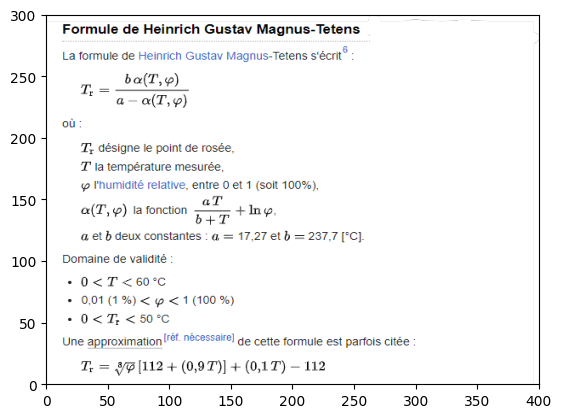

In [11]:
img = plt.imread(r"C:\Users\jean\Pictures\Screenshots\Screenshot 2024-06-04 095520.png")    # don't work with svg files
fig, ax = plt.subplots()
x = range(300)
ax.imshow(img, extent=[0, 400, 0, 300])

Le point de rosée est une donnée thermodynamique caractérisant l'humidité dans un gaz. 
Le point de rosée de l'air est la température à laquelle la pression partielle de vapeur 
d'eau est égale à sa pression de vapeur saturante. Il s'agit donc de la température à 
laquelle il faut refroidir un volume d'air, à pression et humidité absolue constantes, 
pour qu'il devienne saturé donc il y a condensation.

La dépression du point de rosée est la différence entre la température et le point de rosée : (T-Tr)
 à un niveau de pression donnée de l'atmosphère terrestre

 https://fr.wikipedia.org/wiki/Point_de_ros%C3%A9e


La dépression du point de rosée est la différence entre la température et le point de rosée (T-Tr) à un niveau de pression donnée de l'atmosphère terrestre7. Plus cette valeur est petite, plus l’humidité relative à cette altitude est grande et plus la présence de nuages est probable. Ainsi, une dépression de plus de 5 °C est en général associée avec l'absence de couche nuageuse et une valeur près de 0 °C est synonyme d'une couverture complète. La variation dans la troposphère de la dépression du point de rosée, analysée sur un diagramme thermodynamique comme un téphigramme, permet de connaître la hauteur, l'épaisseur et l'étendue des couches nuageuses sur une région.

Text(0.5, 1.0, 'Point de rosée')

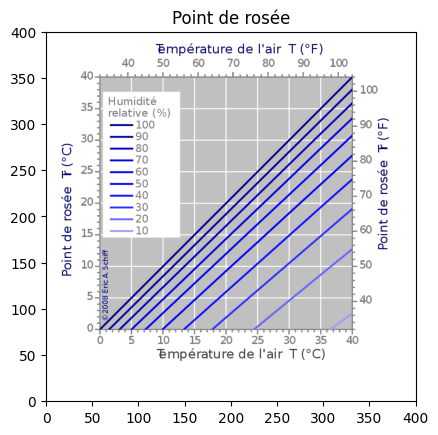

In [12]:
img = plt.imread(r"C:\Users\jean\Pictures\1024px-Dewpoint-RH-fr.svg.png")    # don't work with svg files
fig, ax = plt.subplots()
x = range(300)
ax.imshow(img, extent=[0, 400, 0, 400])
plt.title('Point de rosée')

# si on a hum=80% à la temp=10°C, point de rosée = 7°C, depression = 10-7 = 3 < 5 (nuages)
# si on a hum=70% à la temp=10°C, point de rosée = 5°C, depression = 10-5 = 5 (clair)

In [13]:
import numpy as np
a, b = 17.27, 237.7

def alpha(T,phi):
    '''
    0 < T < 60
    0.01 < phi < 1
    '''
    return a*T/(b+T) + np.log(phi)

def dewpoint(T, phi): # phi : humidité relative
    f = alpha(T,phi)
    Tr = b*f/(a-f)
    return (T,Tr,T-Tr) #round(Tr,2), round(T-Tr,2)   # dewpoint, depression


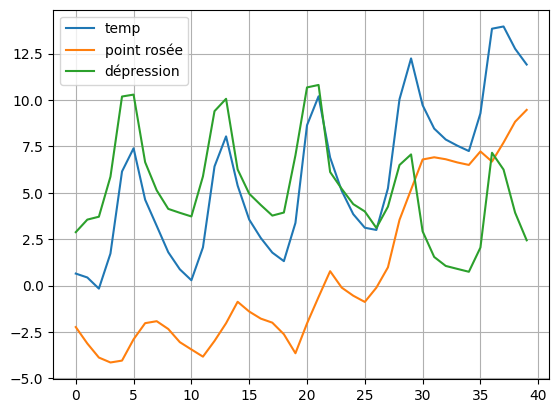

In [14]:
x = np.arange(40)
x_temp = current.temp
x_hum = current.humidity/100

rosee = dewpoint(x_temp,x_hum)
plt.plot(x,x_temp,label='temp')
plt.plot(x,rosee[1],label='point rosée')
plt.plot(x,rosee[2],label='dépression')
plt.grid()
plt.legend()


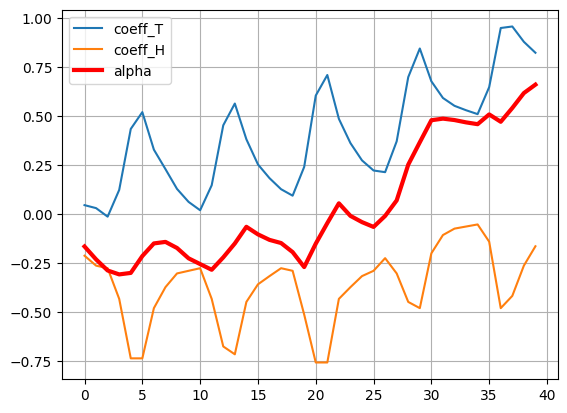

In [15]:
# alpha(temp,hum)
y_temp = a*x_temp/(b+x_temp)
y_hum = np.log(x_hum)
plt.plot(x,y_temp,label='coeff_T')
plt.plot(x,y_hum,label='coeff_H')  # valeurs négatives
f = y_temp+y_hum  # alpha() = y_temp + y_hum
plt.plot(x,f,label='alpha',lw=3,c='red')
plt.grid()
plt.legend()


(237.7, 17.27)

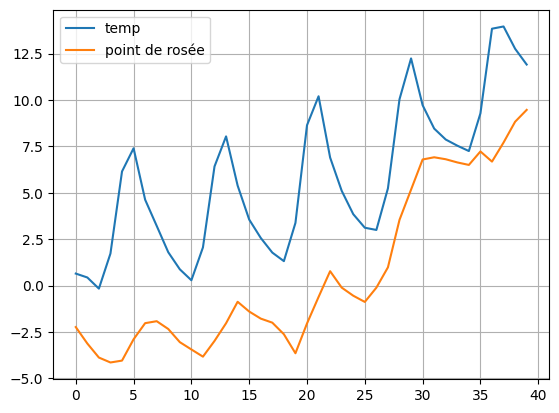

In [16]:
# point de rosée
plt.plot(x,x_temp,label='temp')
plt.plot(x,b*f/(a-f),label='point de rosée')
plt.grid()
plt.legend()
b,a


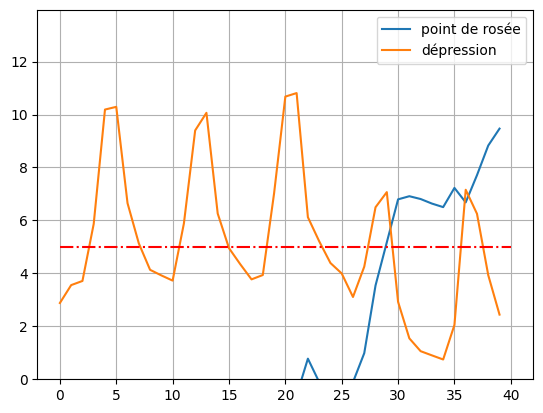

In [17]:
plt.plot(x,b*f/(a-f),label='point de rosée')
plt.plot(x,x_temp - b*f/(a-f),label='dépression')
plt.plot((0,40),(5,5),'r-.')  # si depression < 5, risuqe de nuages et pluie
plt.grid()
plt.ylim(0,max(x_temp))
plt.legend()

In [18]:
# alpha
f = y_temp+y_hum
f, alpha(x_temp,x_hum)


(0    -0.163624
 1    -0.229456
 2    -0.286069
 3    -0.305999
 4    -0.298412
         ...   
 35    0.509639
 36    0.472178
 37    0.542480
 38    0.618477
 39    0.661509
 Length: 40, dtype: float64,
 0    -0.163624
 1    -0.229456
 2    -0.286069
 3    -0.305999
 4    -0.298412
         ...   
 35    0.509639
 36    0.472178
 37    0.542480
 38    0.618477
 39    0.661509
 Length: 40, dtype: float64)

In [19]:
(x,y_hum)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 0    -0.210721
 1    -0.261365
 2    -0.274437
 3    -0.430783
 4    -0.733969
         ...   
 35   -0.139262
 36   -0.478036
 37   -0.415515
 38   -0.261365
 39   -0.162519
 Name: humidity, Length: 40, dtype: float64)

In [20]:
dewpoint(current.temp[0],current.humidity[0]/100)

(0.65, -2.2309475802838303, 2.8809475802838302)

In [21]:
dewpt = dewpoint(current.temp ,current.humidity/100) 
dewpt[1] # point de rosée

0    -2.230948
1    -3.116762
2    -3.873230
3    -4.138364
4    -4.037510
        ...   
35    7.227840
36    6.681624
37    7.708708
38    8.828743
39    9.467493
Length: 40, dtype: float64

In [22]:
dewpt[2]   # dépression

0      2.880948
1      3.556762
2      3.713230
3      5.868364
4     10.187510
        ...    
35     2.052160
36     7.158376
37     6.251292
38     3.931257
39     2.442507
Length: 40, dtype: float64

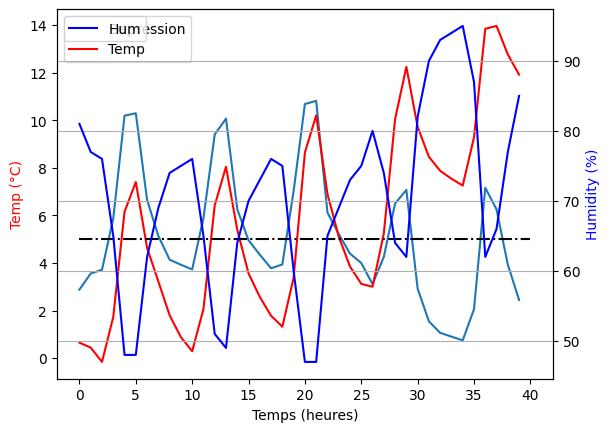

In [23]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(dewpt[2],label='Depression')
ax1.plot(current.temp,'r',label='Temp')
ax2.plot(current.humidity,'b',label='Hum')
ax1.plot((0,40),(5,5),'k-.')  # black
#plt.ylim(min(dewpt[2])-2,max(current.temp)+2)
ax1.set_xlabel('Temps (heures)')
ax1.set_ylabel('Temp (°C)', color='r')
ax2.set_ylabel('Humidity (%)', color='b')
ax1.legend()
ax2.legend()
plt.grid()
plt.show()


In [24]:
current.temp.head(),current.h_time.head()

(0    0.65
 1    0.44
 2   -0.16
 3    1.73
 4    6.15
 Name: temp, dtype: float64,
 0    01
 1    04
 2    07
 3    10
 4    13
 Name: h_time, dtype: object)

In [25]:
current['dew_point'] = dewpt[1]
current[['h_time','temp','dew_point']]

,h_time,temp,dew_point
0,01,0.65,-2.230948
1,04,0.44,-3.116762
2,07,-0.16,-3.873230
3,10,1.73,-4.138364
4,13,6.15,-4.037510
...,...,...,...
35,10,9.28,7.227840
36,13,13.84,6.681624
37,16,13.96,7.708708
38,19,12.76,8.828743


In [26]:
current.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   temp        40 non-null     float64       
 1   feels_like  40 non-null     float64       
 2   temp_min    40 non-null     float64       
 3   temp_max    40 non-null     float64       
 4   pressure    40 non-null     int64         
 5   sea_level   40 non-null     int64         
 6   grnd_level  40 non-null     int64         
 7   humidity    40 non-null     int64         
 8   temp_kf     40 non-null     float64       
 9   dt          40 non-null     int64         
 10  dates       40 non-null     datetime64[ns]
 11  h_date      40 non-null     object        
 12  h_time      40 non-null     object        
 13  dew_point   40 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(5), object(2)
memory usage: 4.5+ KB


In [27]:
current.dates

0    2025-02-16 01:00:00
1    2025-02-16 04:00:00
2    2025-02-16 07:00:00
3    2025-02-16 10:00:00
4    2025-02-16 13:00:00
             ...        
35   2025-02-20 10:00:00
36   2025-02-20 13:00:00
37   2025-02-20 16:00:00
38   2025-02-20 19:00:00
39   2025-02-20 22:00:00
Name: dates, Length: 40, dtype: datetime64[ns]

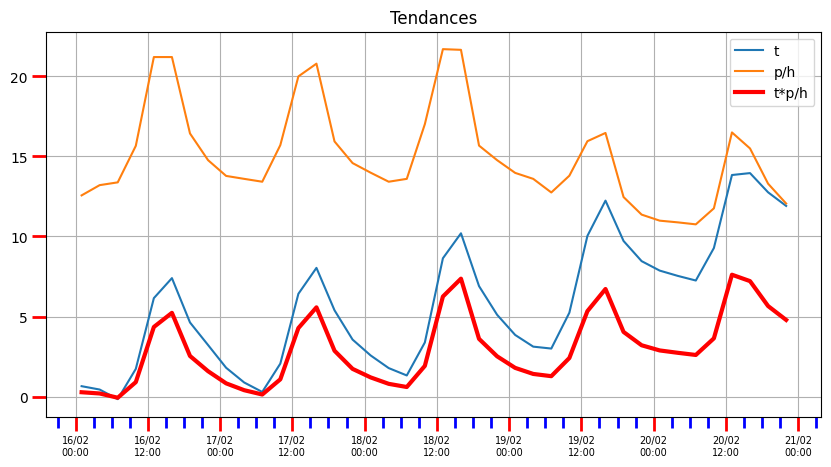

In [28]:
result1=current.temp  #*current.humidity*current.pressure
result2=(current.pressure)/(current.humidity*10)  #p/h est normalisé, on ramène le rapport autour de 1
result3=(current.temp)*result2

fig, ax = plt.subplots()

# nombre de ticks sur axe des x
major_ticks = 1/2                   # toutes les 6 heures pour 1/4, 12h pour 1/2, 3 heures pour 1/8
minor_ticks = major_ticks/4          # denominateur n = n minor ticks 


# format grid
fig.set_size_inches(10, 5)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
ax.tick_params('x', labelsize=7)
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10, color='r')
ax.tick_params(which='minor', length=8, color='b')

# plot
plt.plot(current.dates, result1,label='t')
plt.plot(current.dates, result2*10,label='p/h')
plt.plot(current.dates, result3/3,label='t*p/h',lw=3,c='red')
plt.legend()
plt.title('Tendances')
plt.grid()

<Axes: >

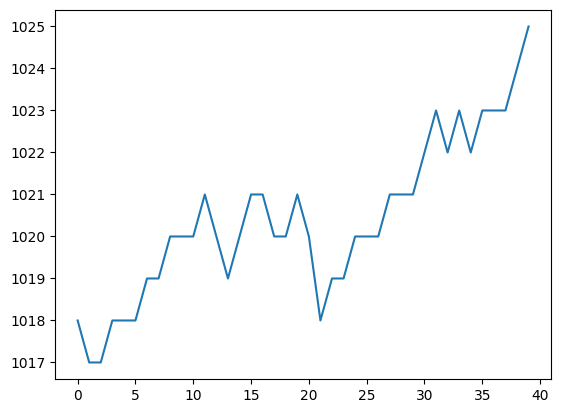

In [29]:
current.pressure.plot()

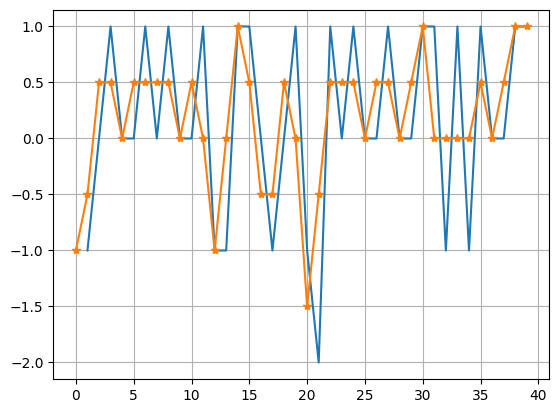

In [30]:
dy.diff().plot()
plt.plot(x,np.gradient(dy, dx), '-*', label='approx')
plt.grid()

In [31]:
len(dy)

40

In [32]:
current.dates

0    2025-02-16 01:00:00
1    2025-02-16 04:00:00
2    2025-02-16 07:00:00
3    2025-02-16 10:00:00
4    2025-02-16 13:00:00
             ...        
35   2025-02-20 10:00:00
36   2025-02-20 13:00:00
37   2025-02-20 16:00:00
38   2025-02-20 19:00:00
39   2025-02-20 22:00:00
Name: dates, Length: 40, dtype: datetime64[ns]

In [33]:
current.h_date

0     16/02/2025 01:00:00
1     16/02/2025 04:00:00
2     16/02/2025 07:00:00
3     16/02/2025 10:00:00
4     16/02/2025 13:00:00
             ...         
35    20/02/2025 10:00:00
36    20/02/2025 13:00:00
37    20/02/2025 16:00:00
38    20/02/2025 19:00:00
39    20/02/2025 22:00:00
Name: h_date, Length: 40, dtype: object

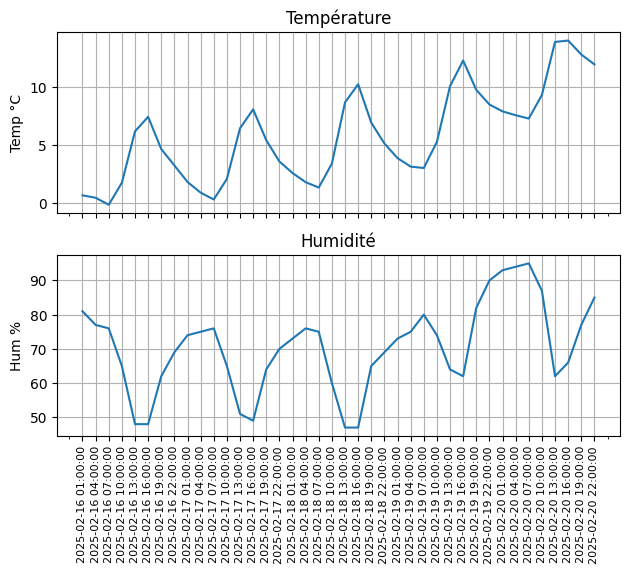

In [34]:
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,)
temp = current.temp 
temp.plot(grid=True, ax=ax1)
ax1.title.set_text('Température')
ax1.set_ylabel('Temp °C')
ax2.title.set_text('Humidité')
plt.tight_layout()
current.humidity.plot(grid=True, ax=ax2)
ax2.set_ylabel('Hum %')

ax2.xaxis.set_major_formatter(formatter)
ax2.xaxis.set_major_locator(MultipleLocator(3))  
ax2.xaxis.set_minor_locator(MultipleLocator(1))

ax2.set(xticks=x, xticklabels=current.dates)
ax2.tick_params('x', labelsize=8, rotation=90)

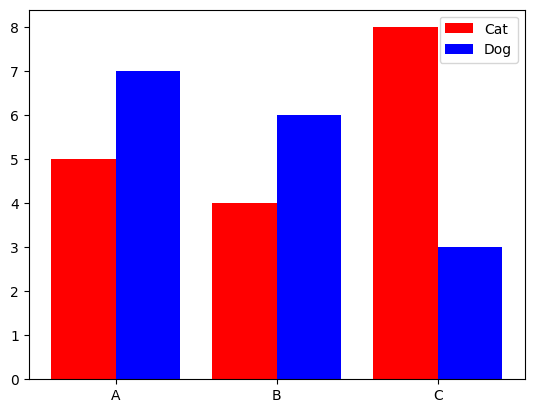

In [35]:
xticks = ['A','B','C']
Scores = np.array([[5,7],[4,6],[8,3]])
colors = ['red','blue']
names = ["Cat", "Dog"]

fig, ax = plt.subplots()

x = np.arange(len(Scores))
ax.bar(x-0.2, Scores[:,0], color=colors[0], width=0.4, label=names[0])
ax.bar(x+0.2, Scores[:,1], color=colors[1], width=0.4, label=names[1])
ax.set(xticks=x, xticklabels=xticks)
ax.legend()
plt.show()

In [36]:
datetime.now().strftime('%d/%m/%Y %H:%M:%S')

'15/02/2025 23:20:38'

# Tendances Météo sur 5 jours

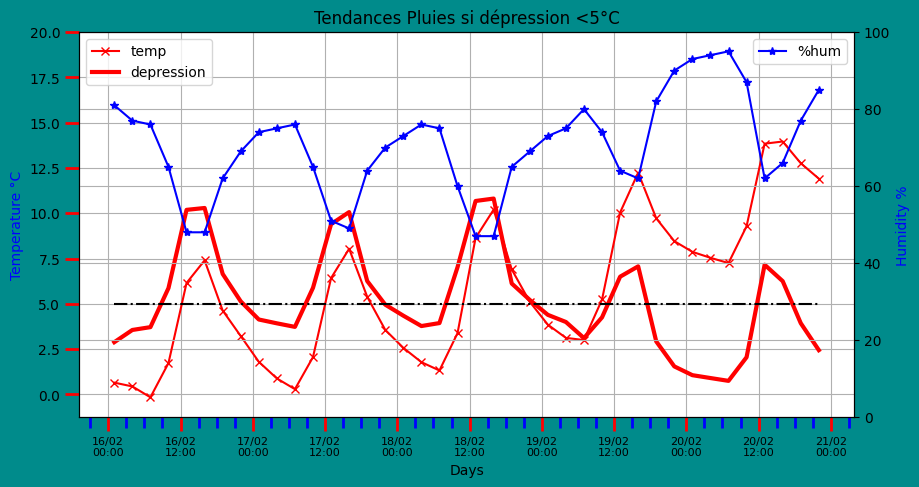

In [37]:
# point de rosée
current['dewpoint']=dewpt[1]
point_rosee = dewpt[1]
# calcul de la dépression
depression = current.temp-point_rosee
current['depression']=depression
fig, ax1 = plt.subplots(facecolor='darkcyan')
ax2 = ax1.twinx()
ax1.set_xlabel('Days')
ax1.set_ylabel('Temperature °C', color='b')
ax2.set_ylabel('Humidity %', color='b')
# format grid
fig.set_size_inches(10, 5)
# graduations axeX
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax1.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
ax1.tick_params('x', labelsize=8)  # size of x_axis labels
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=10, color='r')
ax1.tick_params(which='minor', length=8, color='b')

# plot
ax1.plot(current.dates, temp,'x-',label='temp',color='r')
ax2.plot(current.dates, current.humidity,'*-',label='%hum',color='blue')
#ax1.plot(current.dates, point_rosee,label='point de rosée')#,lw=3,c='red')
# tendances pluie
#lbl = 'depr<5+ "pluie" if depression[0]<5 else ""
ax1.plot(current.dates, depression,label="depression",lw=3,c='red')
#ax1.plot(current.dates, depression+dy.diff(),'-.',label="depression+diffpressure",lw=2,c='blue')
ax1.plot((current.dates[0],current.dates[39]),(5,5),'-.',color='black') 

# https://stackoverflow.com/questions/28095852/set-ylim-on-subplot-secondary-y-axis
ax1.set_ylim(min(depression)-2,20)#max(current.temp)+5)
ax2.set_ylim(0, 100)
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.title('Tendances Pluies si dépression <5°C')
ax1.grid()
ax2.grid()

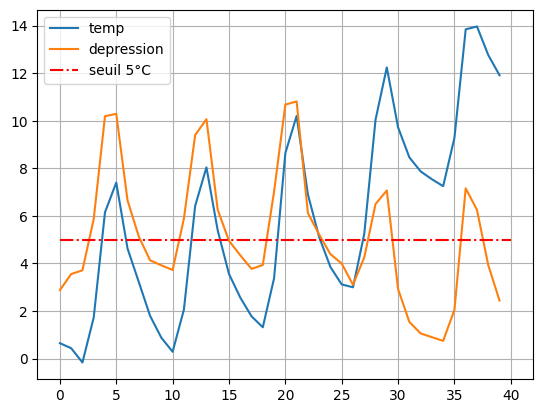

In [38]:
current[['h_date','temp','depression']].plot(grid=True)
plt.plot((0,40),(5,5),'-.',c='red',label='seuil 5°C')
plt.legend()
plt.show()

In [39]:
d = current['h_date'].apply(lambda x: x[:2]+'\n'+x[11:13])
d

0     16\n01
1     16\n04
2     16\n07
3     16\n10
4     16\n13
       ...  
35    20\n10
36    20\n13
37    20\n16
38    20\n19
39    20\n22
Name: h_date, Length: 40, dtype: object

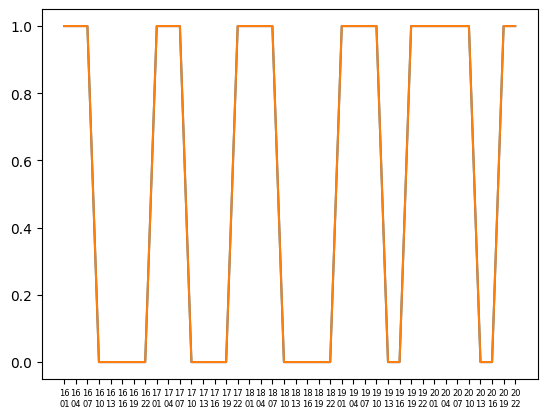

In [40]:
current['tendances']=current['depression'].apply(lambda x: 'pluie' if x<5 else 'beau temps')

trends = np.multiply(current['tendances']=='pluie',1) #== True
#trends.plot()

plt.plot(d,trends)
plt.xticks(fontsize = 6) 
plt.plot(d,trends)
plt.show()

In [41]:
bt= current.tendances == 'beau temps'
bt

0     False
1     False
2     False
3      True
4      True
      ...  
35    False
36     True
37     True
38    False
39    False
Name: tendances, Length: 40, dtype: bool

In [42]:
# heure beau temps
bt = current[current.tendances == 'beau temps'][['h_date','temp']]
bt

,h_date,temp
3,16/02/2025 10:00:00,1.73
4,16/02/2025 13:00:00,6.15
5,16/02/2025 16:00:00,7.40
6,16/02/2025 19:00:00,4.63
7,16/02/2025 22:00:00,3.22
11,17/02/2025 10:00:00,2.06
12,17/02/2025 13:00:00,6.42
13,17/02/2025 16:00:00,8.04
14,17/02/2025 19:00:00,5.39
19,18/02/2025 10:00:00,3.38


In [44]:

def format_date_heure(x):
    global memo
    jour = x[:2]
    heure = x[11:13]
    if jour == memo:
        jour = ''
    memo = x[:2]
    return jour+'\n'+heure


In [47]:
memo = ''
d2 = bt['h_date'].apply(lambda x: format_date_heure(x))  #x[:2]+'\n'+x[11:13])
#d2

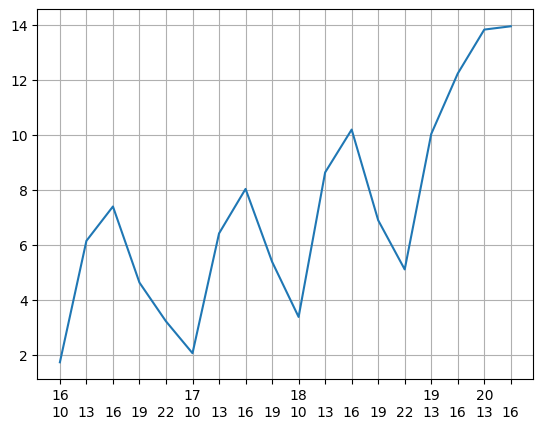

In [48]:
# format date/heure
memo = ''
d = bt['h_date'].apply(lambda x: x[:2]+'\n'+x[11:13])
plt.plot(d,bt.temp)
plt.xticks(ticks=range(len(d2)), labels=d2)
plt.grid()
plt.show()


Text(0, 0.5, 'Temperature')

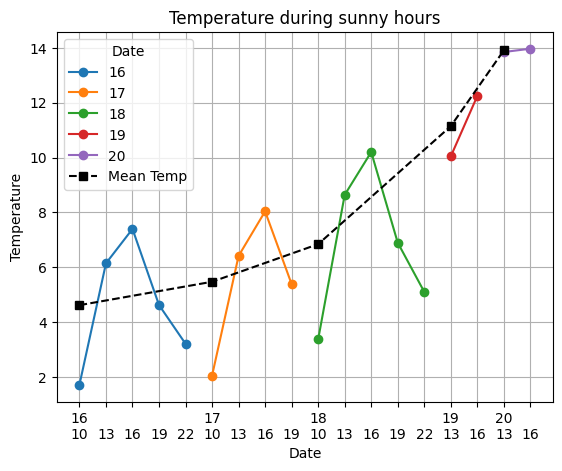

In [49]:
bt['date'] = bt['h_date'].apply(lambda x: x[:2])
#bt
btgp =bt.groupby('date')
for name, group in btgp:
    plt.plot(group['h_date'], group['temp'], marker='o', linestyle='-', label=name)
plt.legend(title='Date')
plt.xlabel('Date and Time')
plt.ylabel('Temperature')
plt.title('Temperature during sunny hours')
plt.xticks(ticks=range(len(d2)), labels=d2)
plt.grid()
#plt.show()

# Add a temp mean column in btgp
bt['temp_mean'] = btgp['temp'].transform('mean')

# Plot only the first row of each group
first_rows = btgp.first()
plt.plot(first_rows['h_date'], first_rows['temp_mean'], marker='s', linestyle='--', color='black', label='Mean Temp')
plt.legend(title='Date')
plt.xlabel('Date')
plt.ylabel('Temperature')



In [50]:
# Add a cumulative mean column in btgp
bt['temp_cummean'] = btgp['temp'].transform(lambda x: x.expanding().mean())
bt[['h_date', 'temp', 'temp_mean', 'temp_cummean']]



,h_date,temp,temp_mean,temp_cummean
3,16/02/2025 10:00:00,1.73,4.6260,1.730000
4,16/02/2025 13:00:00,6.15,4.6260,3.940000
5,16/02/2025 16:00:00,7.40,4.6260,5.093333
6,16/02/2025 19:00:00,4.63,4.6260,4.977500
7,16/02/2025 22:00:00,3.22,4.6260,4.626000
11,17/02/2025 10:00:00,2.06,5.4775,2.060000
12,17/02/2025 13:00:00,6.42,5.4775,4.240000
13,17/02/2025 16:00:00,8.04,5.4775,5.506667
14,17/02/2025 19:00:00,5.39,5.4775,5.477500
19,18/02/2025 10:00:00,3.38,6.8460,3.380000


Text(0, 0.5, 'Temperature')

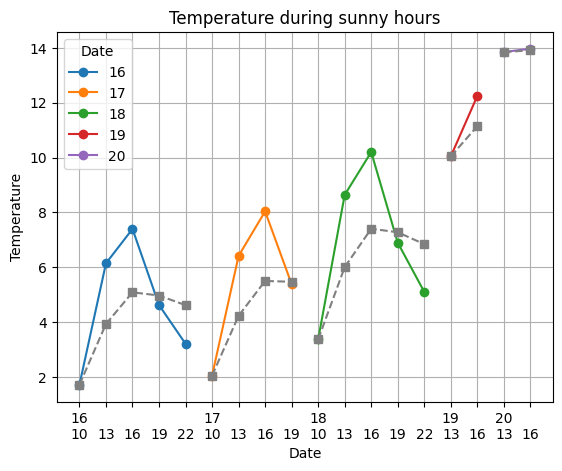

In [51]:
bt['date'] = bt['h_date'].apply(lambda x: x[:2])
#bt
btgp =bt.groupby('date')
for name, group in btgp:
    plt.plot(group['h_date'], group['temp'], marker='o', linestyle='-', label=name)
plt.legend(title='Date')
plt.xlabel('Date and Time')
plt.ylabel('Temperature')
plt.title('Temperature during sunny hours')
plt.xticks(ticks=range(len(d2)), labels=d2)
plt.grid()
#plt.show()
for name, group in btgp:   
    plt.plot(group['h_date'], group['temp_cummean'], marker='s', linestyle='--', color='grey')
#plt.plot(marker='s', linestyle='--', color='black', label='Cumul Mean Temp')
plt.legend(title='Date')
plt.xlabel('Date')
plt.ylabel('Temperature')


In [65]:

handles, labels = ax1.get_legend_handles_labels()
handles, labels 

([<matplotlib.lines.Line2D at 0x1d023a0d7c0>,
 ['16', '17', '18', '19', '20'])

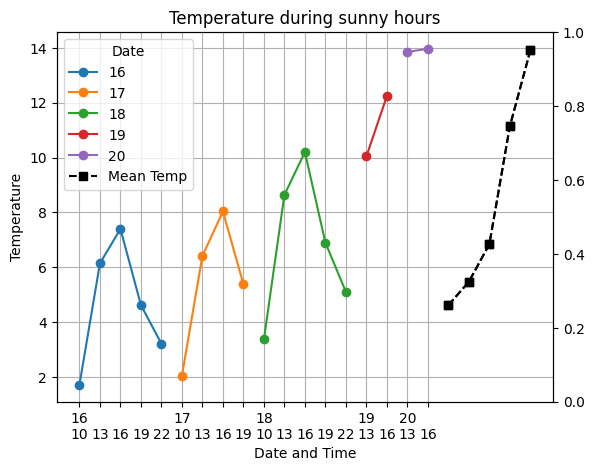

In [53]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for name, group in btgp:
    ax1.plot(group['h_date'], group['temp'], marker='o', linestyle='-', label=name)

mean_temp = btgp['temp'].mean()
ax1.plot(mean_temp.index, mean_temp.values, marker='s', linestyle='--', color='black', label='Mean Temp')

ax1.set_xlabel('Date and Time')
ax1.set_ylabel('Temperature')
ax1.set_title('Temperature during sunny hours')
ax1.legend(title='Date')
ax1.grid()



plt.xticks(ticks=range(len(d2)), labels=d2)
ax1.plot(mean_temp.index, mean_temp.values, marker='s', linestyle='--', color='black', label='Mean Temp')
plt.show()


In [54]:
# first 24 h
current[:8][['h_date','temp','depression','tendances']]

,h_date,temp,depression,tendances
0,16/02/2025 01:00:00,0.65,2.880948,pluie
1,16/02/2025 04:00:00,0.44,3.556762,pluie
2,16/02/2025 07:00:00,-0.16,3.713230,pluie
3,16/02/2025 10:00:00,1.73,5.868364,beau temps
4,16/02/2025 13:00:00,6.15,10.187510,beau temps
5,16/02/2025 16:00:00,7.40,10.290019,beau temps
6,16/02/2025 19:00:00,4.63,6.650702,beau temps
7,16/02/2025 22:00:00,3.22,5.134717,beau temps


In [55]:
# next 4 days 
for i in range(1,5):
    print(current[8*i:8*(i+1)][['h_date','temp','depression','tendances']])

                 h_date  temp  depression   tendances
8   17/02/2025 01:00:00  1.80    4.134705       pluie
9   17/02/2025 04:00:00  0.88    3.923360       pluie
10  17/02/2025 07:00:00  0.29    3.727202       pluie
11  17/02/2025 10:00:00  2.06    5.884353  beau temps
12  17/02/2025 13:00:00  6.42    9.398781  beau temps
13  17/02/2025 16:00:00  8.04   10.064037  beau temps
14  17/02/2025 19:00:00  5.39    6.258909  beau temps
15  17/02/2025 22:00:00  3.56    4.953499       pluie
                 h_date   temp  depression   tendances
16  18/02/2025 01:00:00   2.57    4.345725       pluie
17  18/02/2025 04:00:00   1.78    3.773648       pluie
18  18/02/2025 07:00:00   1.32    3.937725       pluie
19  18/02/2025 10:00:00   3.38    7.021608  beau temps
20  18/02/2025 13:00:00   8.64   10.677365  beau temps
21  18/02/2025 16:00:00  10.20   10.810059  beau temps
22  18/02/2025 19:00:00   6.90    6.121291  beau temps
23  18/02/2025 22:00:00   5.11    5.214724  beau temps
                 h_

In [56]:
t = list("1234546")
t

['1', '2', '3', '4', '5', '4', '6']

In [57]:

sum((int(n)) for n in list(t))

25